In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.inception_v3 import decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import load_model

2023-12-10 09:24:39.055335: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
model = load_model('../model/Inception_v1_25_0.945.h5')

2023-12-10 09:24:44.407276: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-10 09:24:44.413589: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-10 09:24:44.414172: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-10 09:24:44.415074: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [3]:
test_dir='../dataset/test'
train_dir='../dataset/train'
dataset_dir='../dataset'

test_df = pd.read_csv(f'{dataset_dir}/test.csv')
test_df.columns = test_df.columns.str.lower()
test_df.columns

Index(['image_id'], dtype='object')

In [4]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_ds = test_gen.flow_from_dataframe(
    test_df,
    directory=f'{test_dir}',
    x_col='image_id',
    target_size=(299,299), 
    batch_size=32,
    class_mode=None
)

Found 2056 validated image filenames.


In [5]:
predictions = model.predict(test_ds)

2023-12-09 18:39:30.775812: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-12-09 18:39:31.433461: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-09 18:39:31.433940: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-09 18:39:31.433970: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-12-09 18:39:31.434617: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-09 18:39:31.434711: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


65/65 [==============================] - 24s 296ms/step


In [5]:
labels = ['Badminton', 'Cricket', 'Karate', 'Soccer', 'Swimming', 'Tennis', 'Wrestling']

In [6]:
def predictV1(img):
    x = np.array(img)
    X = np.array([x])
    X = preprocess_input(X)
    predictions = model.predict(X)
    return dict(zip(labels,predictions[0]))

In [7]:
def predictV2(img):
    x = np.array(img)
    X = np.array([x])
    X = preprocess_input(X)
    predictions = model.predict(X)
    predicted_classes = np.argmax(predictions, axis=1)
    predicted_sports_names = [labels[idx] for idx in predicted_classes]
    return predicted_sports_names

In [8]:
sample_df = pd.read_csv(f'{dataset_dir}/sample_submission.csv')
sample_df.columns = sample_df.columns.str.lower()

sample_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
sample_ds = sample_gen.flow_from_dataframe(
    sample_df,
    directory=f'{test_dir}',
    x_col='image_id',
    y_col='label',
    target_size=(299,299), 
    batch_size=32
)

Found 7 validated image filenames belonging to 7 classes.


In [9]:
model.evaluate(sample_ds)

/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2023-12-10 09:25:13.604498: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-12-10 09:25:14.238072: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-10 09:25:14.238564: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-10 09:25:14.238603: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-12-10 09:25:14.239254: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child proces

1/1 [==============================] - 4s 4s/step - loss: 0.1172 - accuracy: 1.0000


[0.11715088784694672, 1.0]

In [11]:
img = load_img(f'{test_dir}/d9a2541d7e.jpg' , target_size=(299,299))
predictV2(img)

1/1 [==============================] - 2s 2s/step


['Wrestling']

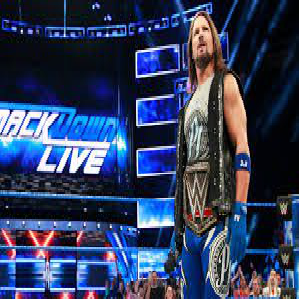

In [13]:
load_img(f'{test_dir}/d9a2541d7e.jpg', target_size=(299,299))